In [108]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
# reading data
bank_data = pd.read_csv('bank-full.csv')

In [3]:
frame = pd.DataFrame(bank_data)

In [4]:
frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA


## shape of data

In [5]:
frame.shape

(45211, 17)

## data type of each data

In [6]:
frame.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
print frame.job.value_counts()
print frame.marital.value_counts()
print frame.education.value_counts()
print frame.default.value_counts()
print frame.housing.value_counts()
print frame.loan.value_counts()
print frame.contact.value_counts()
print frame.month.value_counts()
print frame.poutcome.value_counts()
print frame.Target.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

## checking missing null/ missing values

In [8]:
frame.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

## 5 point summary of numerical data


In [9]:
frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
frame.describe().loc[['min','25%','50%','75%','max']]

,age,balance,day,duration,campaign,pdays,previous
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0


In [11]:
# insights from 5 point summary
# 'age' is somewhat right skewed
# 'balance' is highly right skewed. Also range between minimum and maximum value is large indication outliers
# 'day' has no skewnwess at all. distribution is very gaussian in nature
# 'duration' indicates rightb skewness in nature. Also range between minimum and maximum values is great indicating outliers
# 'pdays' 
# 'previous' indicates either unavailibility of data or about majority of the population in the dataset were not contacted before this campaign. That means these cuustomers are new to campaigns by this bank

## checking presence of outliers

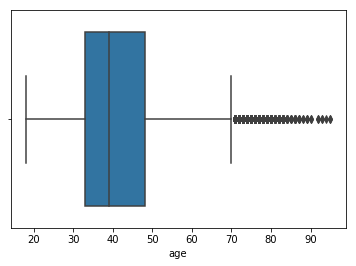

In [95]:
sns.boxplot(frame['age'])

In [96]:
### since the distribution is right skewed, we got outliers on the right end. above 70 yrs are all outliers

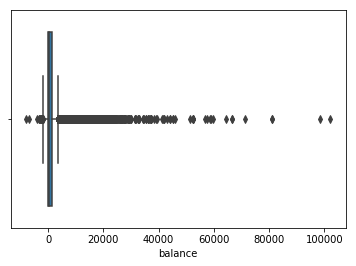

In [97]:

sns.boxplot(frame['balance'])

In [98]:
# since this distribution is highly right skewed, we can see alot of outliers towards the right end.

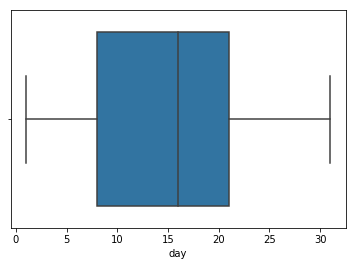

In [99]:
sns.boxplot(frame['day'])

In [100]:
# No skewness and no outliers

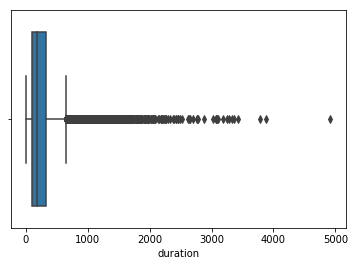

In [101]:
sns.boxplot(frame['duration'])

In [102]:
# right skewed and large range of min and max values show too many outliers on the right end

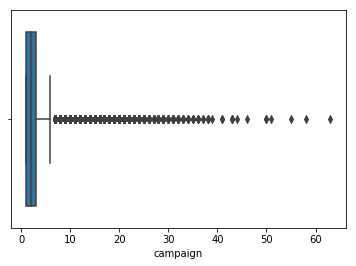

In [103]:
sns.boxplot(frame['campaign'])

In [104]:
# No skewness but since the range is large there are outliers

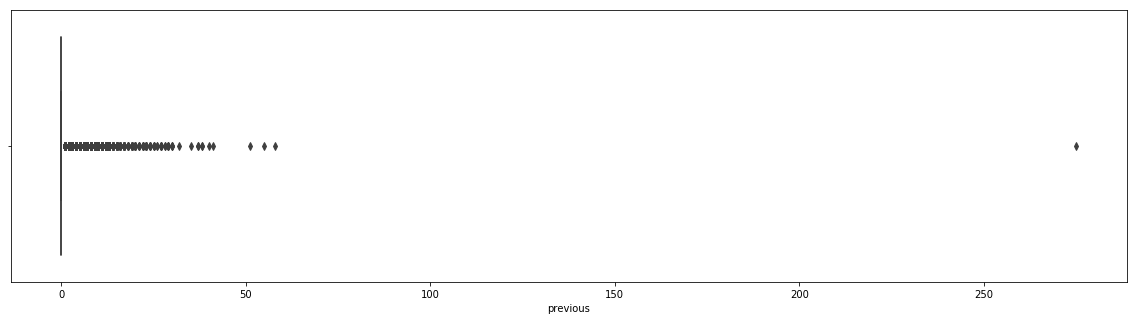

In [105]:
plt.figure(figsize=(20,5))
sns.boxplot(frame['previous'])

In [106]:
# There is not any interquartile range for this feature as the 3/4th of the population has the value 0. anything which is not 0 is considered as outlier here

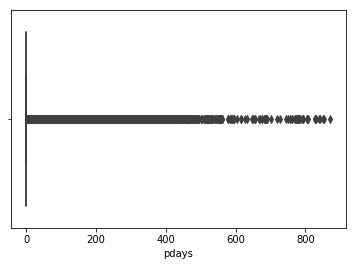

In [107]:
sns.boxplot(frame['pdays'])

In [33]:
# There is not any interquartile range for this feature as the 3/4th of the population has the value 0. anything which is not 0 is considered as outlier here

In [110]:
# There are too many outliers in the categorical data

# Data Preparation

In [12]:
# To summarize here, before we prepare the dataset for modeling, following are the  categories we will be handling:

# 1. Numerical attributes : age,balance,day,duration,pdays,previous,campaign
# 2. features with nominal data, those will be going for one-hot encoding features: Job,marital,contact,poutcome
# 3. features with ordinal data, those will only be assigned numerical values to indicate ranks : education,default,housing,loan,month and Target

In [13]:
df = pd.get_dummies(frame,columns=['job','marital','contact','poutcome'])
df.shape

(45211, 35)

In [14]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,secondary,no,2,yes,yes,5,may,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,unknown,no,1,no,no,5,may,198,1,...,0,0,1,0,0,1,0,0,0,1


In [15]:
temp = df

In [16]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df['default'])
# a = le.transform(df['default'])
from pandas.api.types import CategoricalDtype

yes_no = ['no','yes']
education = ['primary','secondary','tertiary']
month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
temp.education = temp.education.astype(CategoricalDtype(ordered=True,categories=education)).cat.codes
temp.month = temp.month.astype(CategoricalDtype(ordered=True,categories=month)).cat.codes
temp.default = temp.default.astype(CategoricalDtype(ordered=True,categories=yes_no)).cat.codes
temp.housing = temp.housing.astype(CategoricalDtype(ordered=True,categories=yes_no)).cat.codes
temp.loan = temp.loan.astype(CategoricalDtype(ordered=True,categories=yes_no)).cat.codes
temp.Target = temp.Target.astype(CategoricalDtype(ordered=True,categories=yes_no)).cat.codes
temp.head()
# Note that the unknowns of every column have automatically been converted to -1

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,0,2143,1,0,5,4,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,1,0,29,1,0,5,4,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,1,0,2,1,1,5,4,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,4,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,4,198,1,...,0,0,1,0,0,1,0,0,0,1


In [17]:
temp.dtypes

age                  int64
education             int8
default               int8
balance              int64
housing               int8
loan                  int8
day                  int64
month                 int8
duration             int64
campaign             int64
pdays                int64
previous             int64
Target                int8
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
job_unknown          uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
contact_cellular     uint8
contact_telephone    uint8
contact_unknown      uint8
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
dtype: object

In [18]:
temp.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.060516,0.018027,1362.272058,0.555838,0.160226,15.806419,5.144655,258.163080,2.763841,...,0.115171,0.601933,0.282896,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,10.618762,0.778704,0.133049,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,...,0.319232,0.489505,0.450411,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,18.000000,-1.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,4.000000,103.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,5.000000,180.000000,2.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,7.000000,319.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
temp.to_csv('clean_data.csv')

## Standard classification algorithms

#### SVM with default parameters

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
X = temp.drop(['Target','duration'],axis=1)
y = temp.pop('Target')

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

In [26]:
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred1 = svm.predict(X_test)
# print 'training accuracy : ',svm.score(X_train,y_train)
# print 'testing accuracy : ',svm.score(X_test,y_test)
print '============='
print 'Accuracy score: ',metrics.accuracy_score(y_test,y_pred1)
print 'Recall score: ', metrics.recall_score(y_test,y_pred1)
print 'Precision score: ', metrics.precision_score(y_test,y_pred1)

Accuracy score:  0.8858006487761723
Recall score:  0.006447453255963894
Precision score:  0.5555555555555556


#### SVM with C=500

In [28]:
svm = SVC(C=500,cache_size=700)
svm.fit(X_train,y_train)

SVC(C=500, cache_size=700, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred1 = svm.predict(X_test)
# print 'training accuracy : ',svm.score(X_train,y_train)
# print 'testing accuracy : ',svm.score(X_test,y_test)
print '============='
print 'Accuracy score: ',metrics.accuracy_score(y_test,y_pred1)
print 'Recall score: ', metrics.recall_score(y_test,y_pred1)
print 'Precision score: ', metrics.precision_score(y_test,y_pred1)


Accuracy score:  0.11434680035387791
Recall score:  1.0
Precision score:  0.11434680035387791


In [30]:
# SVM is clearly not helping in recall and precision score. However the accuracy score of the model is still acceptable

#### Logistic regression

In [31]:
mod = LogisticRegression()
mod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = mod.predict(X_test)

print 'Confusion Metrics Logistic Regression: '
print metrics.confusion_matrix(y_test,y_pred)

acc_LogReg = metrics.accuracy_score(y_test,y_pred)
recall_LogReg = metrics.recall_score(y_test,y_pred)
precision_LogReg =  metrics.precision_score(y_test,y_pred)
print recall_LogReg
print precision_LogReg

Confusion Metrics Logistic Regression: 
[[11878   135]
 [ 1282   269]]
0.17343649258542876
0.6658415841584159


In [35]:
#Naive Bayes
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred = nvb.predict(X_test)

print 
print 'Confusion Metrics Naive Bayes: '
print metrics.confusion_matrix(y_test,y_pred)

acc_nvb = metrics.accuracy_score(y_test,y_pred)
recall_nvb = metrics.recall_score(y_test,y_pred)
precision_nvb = metrics.precision_score(y_test,y_pred)
print recall_nvb
print precision_nvb


Confusion Metrics Naive Bayes: 
[[10202  1811]
 [  866   685]]
0.44165054803352677
0.2744391025641026


In [36]:
# Scaling features to be used by models
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
svm = SVC(C=500,cache_size=700)
svm.fit(X_train_scaled,y_train)

SVC(C=500, cache_size=700, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
y_pred1 = svm.predict(X_test_scaled)
# print 'training accuracy : ',svm.score(X_train,y_train)
# print 'testing accuracy : ',svm.score(X_test,y_test)
print '============='
print 'Accuracy score: ',metrics.accuracy_score(y_test,y_pred1)
print 'Recall score: ', metrics.recall_score(y_test,y_pred1)
print 'Precision score: ', metrics.precision_score(y_test,y_pred1)
acc_svm = metrics.accuracy_score(y_test,y_pred1)
recall_svm =  metrics.recall_score(y_test,y_pred1)
precision_svm = metrics.precision_score(y_test,y_pred1)

Accuracy score:  0.8952373930993807
Recall score:  0.1650548033526757
Precision score:  0.6701570680628273


## Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [71]:
y.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [72]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [73]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8288115600117959


In [74]:
print dTree.score(X_test,y_test)
acc_dTree = dTree.score(X_test,y_test)
yPred_dTree = dTree.predict(X_test)
print metrics.confusion_matrix(y_test,yPred_dTree)
print metrics.recall_score(y_test,yPred_dTree)
print metrics.precision_score(y_test,yPred_dTree)

rec_dTree = metrics.recall_score(y_test,yPred_dTree)
prec_dTree = metrics.precision_score(y_test,yPred_dTree)


0.8288115600117959
[[10718  1295]
 [ 1027   524]]
0.33784655061250807
0.2880703683342496


## Decision tree with regularization

In [75]:
dTreeR = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(X_train,y_train)
print dTreeR.score(X_train,y_train)
print dTreeR.score(X_test,y_test)

0.8922488703510602
0.8957534650545562


In [76]:
print dTreeR.score(X_test,y_test)
acc_dTreeR = dTreeR.score(X_test,y_test)
yPred_dTreeR = dTreeR.predict(X_test)
print metrics.recall_score(y_test,yPred_dTreeR)
print metrics.precision_score(y_test,yPred_dTreeR)
print metrics.confusion_matrix(y_test,yPred_dTreeR)

rec_dTreeR = metrics.recall_score(y_test,yPred_dTreeR)
prec_dTreeR = metrics.precision_score(y_test,yPred_dTreeR)

0.8957534650545562
0.1882656350741457
0.6532438478747203
[[11858   155]
 [ 1259   292]]


In [77]:
# Scaling features to be used by models
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [78]:
dTreeR = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTreeR.fit(X_train_scaled,y_train)
print dTreeR.score(X_train_scaled,y_train)
print dTreeR.score(X_test_scaled,y_test)

0.8922488703510602
0.8956797404895311


In [79]:
print dTreeR.score(X_test_scaled,y_test)
yPred_dTreeR = dTreeR.predict(X_test_scaled)
print metrics.recall_score(y_test,yPred_dTreeR)
print metrics.precision_score(y_test,yPred_dTreeR)
print metrics.confusion_matrix(y_test,yPred_dTreeR)

0.8956797404895311
0.1824629271437782
0.6581395348837209
[[11866   147]
 [ 1268   283]]


## Decision tree with Bagging

In [80]:
from sklearn.ensemble import BaggingClassifier

In [81]:
bgcl = BaggingClassifier(base_estimator=dTree,random_state=1,n_estimators=50)
bgcl.fit(X_train,y_train)
print bgcl.score(X_train,y_train)
print bgcl.score(X_test,y_test)

0.9992100357063861
0.8912562665880271


In [82]:
print bgcl.score(X_test,y_test)
acc_bgcl = bgcl.score(X_test,y_test)
yPred_bag = bgcl.predict(X_test)
print metrics.recall_score(y_test,yPred_bag)
print metrics.precision_score(y_test,yPred_bag)
print metrics.confusion_matrix(y_test,yPred_bag)
rec_bgcl = metrics.recall_score(y_test,yPred_bag)
prec_bgcl = metrics.precision_score(y_test,yPred_bag)

0.8912562665880271
0.25338491295938104
0.5535211267605634
[[11696   317]
 [ 1158   393]]


## Decision Tree with boosting

## AdaBoosting

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
abcl = AdaBoostClassifier(n_estimators=150,base_estimator=dTreeR,random_state=1)
abcl.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=150, random_state=1)

In [85]:
print abcl.score(X_test,y_test)
acc_abcl = abcl.score(X_test,y_test)
yPred_abcl = abcl.predict(X_test)
print metrics.recall_score(y_test,yPred_abcl)
print metrics.precision_score(y_test,yPred_abcl)
print metrics.confusion_matrix(y_test,yPred_abcl)
prec_abcl = metrics.precision_score(y_test,yPred_abcl)
rec_abcl = metrics.recall_score(y_test,yPred_abcl)

0.8907401946328517
0.28175370728562216
0.5428571428571428
[[11645   368]
 [ 1114   437]]


## Gradient boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [88]:
print gbcl.score(X_test,y_test)
acc_gbcl = gbcl.score(X_test,y_test)
yPred_gbcl = gbcl.predict(X_test)
print metrics.recall_score(y_test,yPred_gbcl)
print metrics.precision_score(y_test,yPred_gbcl)
print metrics.confusion_matrix(y_test,yPred_gbcl)
rec_gbcl = metrics.recall_score(y_test,yPred_gbcl)
prec_gbcl = metrics.precision_score(y_test,yPred_gbcl)

0.8952373930993807
0.17923920051579625
0.6525821596244131
[[11865   148]
 [ 1273   278]]


## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier


In [90]:
rdf = RandomForestClassifier(n_estimators=50,random_state=1)
rdf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [91]:
print rdf.score(X_test,y_test)
acc_rdf = rdf.score(X_test,y_test)
yPred_rdf = rdf.predict(X_test)
print metrics.recall_score(y_test,yPred_rdf)
print metrics.precision_score(y_test,yPred_rdf)
print metrics.confusion_matrix(y_test,yPred_rdf)

rec_rdf = metrics.recall_score(y_test,yPred_rdf)
prec_rdf = metrics.precision_score(y_test,yPred_rdf)

0.8938366263639045
0.21792392005157962
0.5982300884955752
[[11786   227]
 [ 1213   338]]


In [94]:
accuracy = pd.DataFrame([[acc_LogReg,recall_LogReg,precision_LogReg],[acc_nvb,recall_nvb,precision_nvb],[acc_svm,recall_svm,precision_svm],[acc_dTree,rec_dTree,prec_dTree],[acc_dTreeR,rec_dTreeR,prec_dTreeR],[acc_bgcl,rec_bgcl,prec_bgcl],[acc_abcl,rec_abcl,prec_abcl],[acc_gbcl,rec_gbcl,prec_gbcl],[acc_rdf,rec_rdf,prec_rdf]],columns=['Accuracy','Precision','Recall'],index=['LogisticReg','NaiveBayes','SVM with scaled features and C=500','Decision Tree','Decision Tree with regularization','DT with bagging','DT with Adaboost','DT with GradientBoost','Random forest'])
accuracy

,Accuracy,Precision,Recall
LogisticReg,0.895532,0.173436,0.665842
NaiveBayes,0.802639,0.441651,0.274439
SVM with scaled features and C=500,0.895237,0.165055,0.670157
Decision Tree,0.828812,0.337847,0.288070
Decision Tree with regularization,0.895753,0.188266,0.653244
DT with bagging,0.891256,0.253385,0.553521
DT with Adaboost,0.890740,0.281754,0.542857
DT with GradientBoost,0.895237,0.179239,0.652582
Random forest,0.893837,0.217924,0.598230


# Comparison of models and summary

#### <font color=red>standard classification models</font>
- Since the data has too many outliers and largely skewed features the standard classification algorithms that use Euclidean distance will be greatly affected
- This is clearly indicated by the confusion matrices (rather recall and precision score) of SVM,logistic Regression and Naive bayes
- However upon scaling the features and using C=500 for SVM somewhat gives similar results to that of decision trees with gradient boosting
- But training such large dataset with SVM took very long time to compute. since with SVM the computation time quadratically increases with increase in the number of samples and features
- Such heavy computation is removed by using decision trees
- Although the accuracy with standard decision tree decreases in comparison to SVM with scaled features but time decreased appreciately

####  <font color=red>Decision Tree and  Random forest</font>
- Since all the categorical values have huge numbers of outliers and also one major drawback in the data was the huge difference in the target values. The data tends to be biased towards the negative class as the distribution is heavy for it. I applied some regularization techniques to reduce the overfitting
- with regularization the accuracy sure does increases but recall is very poor
- bagging with decision tree as base model increases the accuracy and recall score both
- Boosting with regularized decision tree as base model helped increased accuracy and recall both even better
- random forest in comparison with bagging boosting does somewhat similar task but recall was not better than Gradient boosting


#### Adaptive boosting with regularized tree (since boosting imporives the accuracy with simpler model) helped in increasing the recall score and precision score the most while maintaining a decent accuracy
